<a href="https://colab.research.google.com/github/danielglz096/data-analytics/blob/main/Reto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.6 MB/s eta 0:00:00


# Evidencia 1

## Estadística descriptiva de los datos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/analitica/reto_final/MODELOS/Limpieza/demografico.csv')

In [4]:
# Mostrar las primeras filas del DataFrame
display(data.head())

# Estadística descriptiva básica
display(data.describe())

,Nº pers.,Fecha nacimiento,Genero,No Hijos,Fecha ingreso,Edad ingreso,CP Vivienda,CP Trabajo,Ubicación,Descubica,Fecha Salida,Antigüedad,Edad salida,Año salida,Desc Medida,Gpo Per,Desc Gpo Pers,Ultima Evaluación,Función,Desc Fun
0,70634620,1984-02-28,Hombre,0,2022-08-24,38,2770,234,986,Suburbia Los Cabos Patio,2022-10-08,0,38,2022,Baja Suburbia,O,SBB Planta,3.0,70000225,Jefe Prevencion Perdidas
1,70636679,1990-12-23,Mujer,0,2022-08-31,31,11500,234,986,Suburbia Los Cabos Patio,2022-11-03,0,31,2022,Baja Suburbia,O,SBB Planta,3.0,70000232,Supervisor Cajas
2,70642442,1981-06-20,Mujer,0,2022-09-28,41,23410,234,986,Suburbia Los Cabos Patio,2022-11-22,0,41,2022,Baja Suburbia,O,SBB Planta,3.0,70000234,Auxiliar Cajero
3,70639827,1993-05-02,Hombre,0,2022-09-14,29,23428,234,986,Suburbia Los Cabos Patio,2022-10-26,0,29,2022,Baja Suburbia,O,SBB Planta,3.0,70000231,Subjefe Proteccion
4,13111365,1993-08-29,Mujer,0,2014-11-13,21,23450,234,986,Suburbia Los Cabos Patio,2022-10-14,7,29,2022,Baja Suburbia,O,SBB Planta,3.0,0,Sin Función


,Nº pers.,No Hijos,Edad ingreso,CP Trabajo,Ubicación,Antigüedad,Edad salida,Año salida,Ultima Evaluación,Función
count,1.171600e+05,117160.000000,117160.000000,117160.000000,117160.000000,117160.000000,117160.000000,117160.000000,117160.000000,1.171600e+05
mean,2.679092e+07,0.496441,27.573421,50422.162649,305.294921,1.629549,29.539962,2020.462760,3.006699,2.029154e+07
std,2.317385e+07,0.929705,9.047680,26904.670133,557.940939,3.805481,9.922022,1.201942,0.364039,3.039660e+07
min,3.369000e+03,0.000000,17.000000,234.000000,0.000000,0.000000,17.000000,2019.000000,1.000000,0.000000e+00
25%,1.473776e+07,0.000000,21.000000,31214.000000,78.000000,0.000000,22.000000,2019.000000,3.000000,8.970000e+02
50%,1.525221e+07,0.000000,25.000000,54680.000000,134.000000,0.000000,26.000000,2021.000000,3.000000,9.450000e+02
75%,1.584382e+07,1.000000,32.000000,72062.000000,499.000000,2.000000,34.000000,2022.000000,3.000000,5.226208e+07
max,7.067521e+07,8.000000,74.000000,99014.000000,9024.000000,45.000000,79.000000,2023.000000,5.000000,7.000048e+07


NameError: ignored

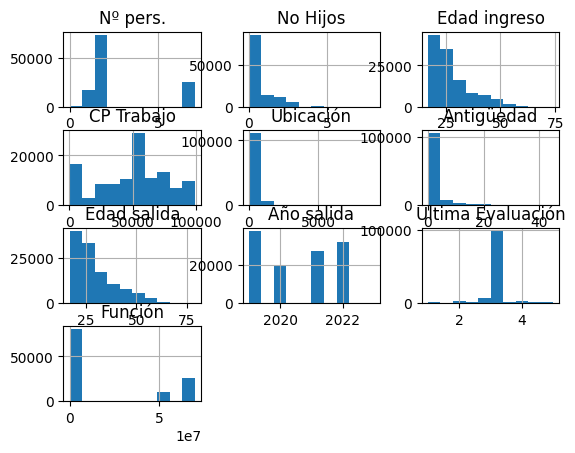

In [5]:
data.hist()
plt.tight_layout()
plt.show()

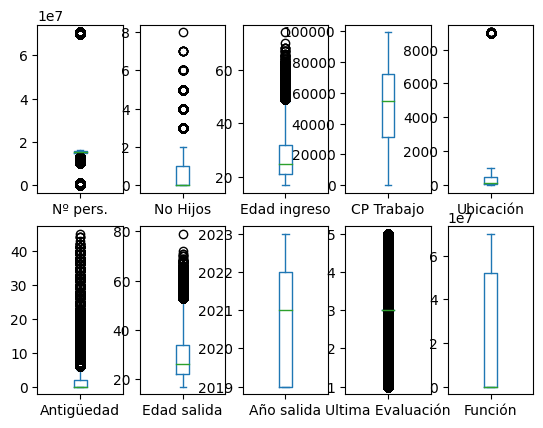

In [ ]:
data.plot(kind='box', subplots=True, layout=(2,-1), sharex=False, sharey=False)
plt.show()

In [6]:
# Eliminar todas las columnas innecesarias
data = data.drop(['Nº pers.','CP Vivienda', 'CP Trabajo', 'Ubicación', 'Año salida', 'Gpo Per', 'Función', 'Antigüedad','Fecha nacimiento'], axis=1)

# Convertir fechas a datetime
data['Fecha ingreso'] = pd.to_datetime(data['Fecha ingreso'])
data['Fecha Salida'] = pd.to_datetime(data['Fecha Salida'])

# Calcular duracion en dias
data['duracion'] = (data['Fecha Salida'] - data['Fecha ingreso']).dt.days

# Eliminar filas donde la duracion sea menor a 90 dias
data = data[data['duracion'] > 90]

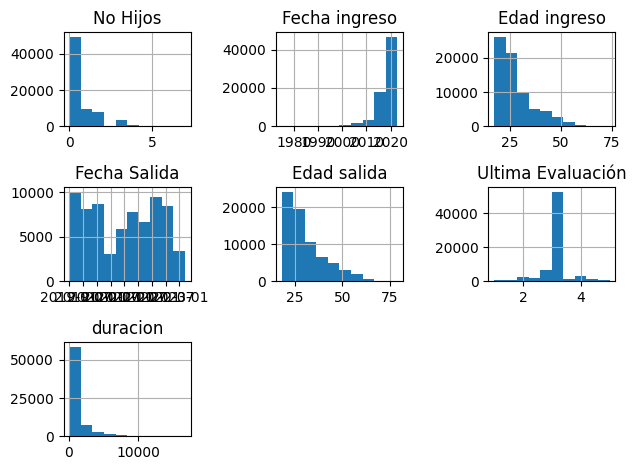

In [ ]:
data.hist()
plt.tight_layout()
plt.show()

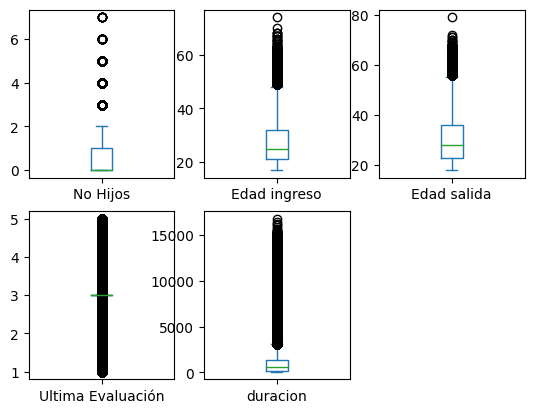

In [ ]:
data.plot(kind='box', subplots=True, layout=(2,-1), sharex=False, sharey=False)
plt.show()

## Conjunto de Datos para Modelacion

In [7]:
# Limpieza de datos
# Tratar valores faltantes
data = data.dropna() # Eliminar filas con valores faltantes

In [8]:
# Tratamiento de valores atípicos
def detect_and_treat_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df

data = detect_and_treat_outliers(data, 'duracion')
data = detect_and_treat_outliers(data, 'Edad ingreso')
data = detect_and_treat_outliers(data, 'Edad salida')

In [9]:
#Codificar variables categoricas
data = pd.get_dummies(data, columns=['Genero'], prefix='', prefix_sep='')

desc_medida_mapping = {
    'Baja': 'baja_liverpool',
    'Baja por Renuncia Voluntaria': 'baja_liverpool',
    'Baja Suburbia': 'baja_suburbia'
}
data['Desc Medida'] = data['Desc Medida'].map(desc_medida_mapping)

data = pd.get_dummies(data, columns=['Desc Medida'], prefix='', prefix_sep='')
data = pd.get_dummies(data, columns=['Desc Gpo Pers'], prefix='', prefix_sep='')

In [10]:
from category_encoders import TargetEncoder

high_cardinality_cols = ['Descubica','Desc Fun']

for col in high_cardinality_cols:
  encoder = TargetEncoder()
  data[col] = encoder.fit_transform(data[col], data['duracion'])

data.reset_index(drop=True, inplace=True)

In [11]:
# Extraer anio de fecha de ingreso
data['Year Ingreso'] = pd.to_datetime(data['Fecha ingreso']).dt.year

data.drop(['Fecha ingreso', 'Fecha Salida'], axis=1, inplace=True)

In [12]:
display(data.columns)

Index(['No Hijos', 'Edad ingreso', 'Descubica', 'Edad salida',
       'Ultima Evaluación', 'Desc Fun', 'duracion', 'Hombre', 'Mujer',
       'baja_liverpool', 'baja_suburbia', 'Eventual No Sind.',
       'Eventual Sind.', 'Planta No Sind.', 'Planta Sind.', 'SBB Eventuales',
       'SBB Planta', 'Vía Planta No Sind.', 'Vía Planta Sind.',
       'Year Ingreso'],
      dtype='object')

In [13]:
data.drop('Edad salida', axis=1, inplace=True)

In [38]:
display(data.head())

,No Hijos,Edad ingreso,Descubica,Ultima Evaluación,Desc Fun,duracion,Hombre,Mujer,baja_liverpool,baja_suburbia,Eventual No Sind.,Eventual Sind.,Planta No Sind.,Planta Sind.,SBB Eventuales,SBB Planta,Vía Planta No Sind.,Vía Planta Sind.,Year Ingreso
0,0,21.0,982.036248,3.00,838.465089,2892,0,1,0,1,0,0,0,0,0,1,0,0,2014
1,0,41.0,982.036248,3.00,848.629416,99,1,0,0,1,0,0,0,0,0,1,0,0,2022
2,0,26.0,982.036248,3.00,534.210701,93,0,1,0,1,0,0,0,0,0,1,0,0,2022
3,0,24.0,982.036248,3.00,1053.153344,93,1,0,0,1,0,0,0,0,0,1,0,0,2022
4,0,18.0,982.036248,3.16,720.689704,2728,0,1,0,1,0,0,0,0,0,1,0,0,2015


edad numero de hijos y funcion en 3D


Quitar genero, años, standard scaler

MAE 180 target

clasificador con rangos de edades (bins)

## Modelación - Regresores

In [14]:
# Selección de características
features = data.drop('duracion', axis=1)
target = data['duracion']

In [15]:
# División de datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

### Lineales

#### Regresion Lineal

In [19]:
# Regresión Lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predicción en el conjunto de prueba
y_pred_lin = lin_reg.predict(X_test)

# Evaluación en el conjunto de prueba
print('Linear Regression R2:', r2_score(y_test, y_pred_lin))
print('Linear Regression MSE:', mean_squared_error(y_test, y_pred_lin))
print('Linear Regression MAE:', mean_absolute_error(y_test, y_pred_lin))

# Predicción en el conjunto de entrenamiento
y_pred_lin_train = lin_reg.predict(X_train)

# Evaluación en el conjunto de entrenamiento
print('Linear Regression R2 (train):', r2_score(y_train, y_pred_lin_train))
print('Linear Regression MSE (train):', mean_squared_error(y_train, y_pred_lin_train))
print('Linear Regression MAE (train):', mean_absolute_error(y_train, y_pred_lin_train))

Linear Regression R2: 0.6768890371046934
Linear Regression MSE: 280747.5420313372
Linear Regression MAE: 391.17761057396024
Linear Regression R2 (train): 0.6825320188288568
Linear Regression MSE (train): 275638.55629857635
Linear Regression MAE (train): 389.6404812638466


#### Regresion Ridge

In [21]:
# Regresión Ridge
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

Ridge()

In [22]:
# Predicción en el conjunto de prueba
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluación en el conjunto de prueba
print('Ridge Regression R2:', r2_score(y_test, y_pred_ridge))
print('Ridge Regression MSE:', mean_squared_error(y_test, y_pred_ridge))
print('Rid Regression MAE:', mean_absolute_error(y_test, y_pred_ridge))

# Predicción en el conjunto de entrenamiento
y_pred_ridge_train = ridge_reg.predict(X_train)

# Evaluación en el conjunto de entrenamiento
print('Ridge Regression R2 (train):', r2_score(y_train, y_pred_ridge_train))
print('Ridge Regression MSE (train):', mean_squared_error(y_train, y_pred_ridge_train))
print('Ridge Regression MAE (train):', mean_absolute_error(y_train, y_pred_ridge_train))

Ridge Regression R2: 0.6768908004403056
Ridge Regression MSE: 280746.00988852634
Rid Regression MAE: 391.1909469299441
Ridge Regression R2 (train): 0.6825312390606868
Ridge Regression MSE (train): 275639.2333248762
Ridge Regression MAE (train): 389.64707277539156


#### Regresion Lasso

In [23]:
# Regresión Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [25]:
# Predicción en el conjunto de prueba
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluación en el conjunto de prueba
print('Lasso Regression R2:', r2_score(y_test, y_pred_lasso))
print('Lasso Regression MSE:', mean_squared_error(y_test, y_pred_lasso))
print('Lasso Regression MAE:', mean_absolute_error(y_test, y_pred_lasso))

# Predicción en el conjunto de entrenamiento
y_pred_lasso_train = lasso_reg.predict(X_train)

# Evaluación en el conjunto de entrenamiento
print('Lasso Regression R2 (train):', r2_score(y_train, y_pred_lasso_train))
print('Lasso Regression MSE (train):', mean_squared_error(y_train, y_pred_lasso_train))
print('Lasso Regression MAE (train):', mean_absolute_error(y_train, y_pred_lasso_train))

Lasso Regression R2: 0.6768252993462508
Lasso Regression MSE: 280802.9230647041
Lasso Regression MAE: 391.30012698033084
Lasso Regression R2 (train): 0.6824627356238453
Lasso Regression MSE (train): 275698.71078261174
Lasso Regression MAE (train): 389.74298552574146


### No lineales

#### Decision Tree

In [28]:
# Árbol de Decisión
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [29]:
# Predicción en el conjunto de prueba
y_pred_tree = tree_reg.predict(X_test)

# Evaluación en el conjunto de prueba
print('Decision Tree R2:', r2_score(y_test, y_pred_tree))
print('Decision Tree MSE:', mean_squared_error(y_test, y_pred_tree))
print('Decision Tree MAE:', mean_absolute_error(y_test, y_pred_tree))

# Predicción en el conjunto de entrenamiento
y_pred_tree_train = tree_reg.predict(X_train)

# Evaluación en el conjunto de entrenamiento
print('Decision Tree R2 (train):', r2_score(y_train, y_pred_tree_train))
print('Decision Tree MSE (train):', mean_squared_error(y_train, y_pred_tree_train))
print('Decision Tree MAE (train):', mean_absolute_error(y_train, y_pred_tree_train))

Decision Tree R2: 0.7852847717798469
Decision Tree MSE: 186563.68703601544
Decision Tree MAE: 285.45733224096944
Decision Tree R2 (train): 0.9967124241570587
Decision Tree MSE (train): 2854.406468732676
Decision Tree MAE (train): 10.767813069090678


#### Random Forest

In [30]:
# Random Forest
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [31]:
# Predicción en el conjunto de prueba
y_pred_forest = forest_reg.predict(X_test)

# Evaluación en el conjunto de prueba
print('Random Forest R2:', r2_score(y_test, y_pred_forest))
print('Random Forest MSE:', mean_squared_error(y_test, y_pred_forest))
print('Random Forest MAE:', mean_absolute_error(y_test, y_pred_forest))

# Predicción en el conjunto de entrenamiento
y_pred_forest_train = forest_reg.predict(X_train)

# Evaluación en el conjunto de entrenamiento
print('Random Forest R2 (train):', r2_score(y_train, y_pred_forest_train))
print('Random Forest MSE (train):', mean_squared_error(y_train, y_pred_forest_train))
print('Random Forest MAE (train):', mean_absolute_error(y_train, y_pred_forest_train))

Random Forest R2: 0.8776986313096993
Random Forest MSE: 106266.30659386086
Random Forest MAE: 232.29608898928464
Random Forest R2 (train): 0.9808191676779677
Random Forest MSE (train): 16653.57530024391
Random Forest MAE (train): 90.05805186580746


#### Polinomial 2 grado

In [34]:
# Crear características polinomiales de grado 2
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Regresión Polinomial de Grado 2
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

LinearRegression()

In [35]:
# Predicción en el conjunto de prueba
y_pred_poly = poly_reg.predict(X_test_poly)

# Evaluación en el conjunto de prueba
print('Polynomial Regression R2:', r2_score(y_test, y_pred_poly))
print('Polynomial Regression MSE:', mean_squared_error(y_test, y_pred_poly))
print('Polynomial Regression MAE:', mean_absolute_error(y_test, y_pred_poly))

# Predicción en el conjunto de entrenamiento
y_pred_poly_train = poly_reg.predict(X_train_poly)

# Evaluación en el conjunto de entrenamiento
print('Polynomial Regression R2 (train):', r2_score(y_train, y_pred_poly_train))
print('Polynomial Regression MSE (train):', mean_squared_error(y_train, y_pred_poly_train))
print('Polynomial Regression MAE (train):', mean_absolute_error(y_train, y_pred_poly_train))

Polynomial Regression R2: 0.8014160793023399
Polynomial Regression MSE: 172547.37234303815
Polynomial Regression MAE: 343.3655235063431
Polynomial Regression R2 (train): 0.8048807881819616
Polynomial Regression MSE (train): 169410.4005488565
Polynomial Regression MAE (train): 342.939052637755


#### KNN

In [36]:
# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Regresión KNN con 5 vecinos cercanos (puedes ajustar el número de vecinos)
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [37]:
# Predicción en el conjunto de prueba
y_pred_knn = knn_reg.predict(X_test_scaled)

# Evaluación en el conjunto de prueba
print('KNN Regression R2:', r2_score(y_test, y_pred_knn))
print('KNN Regression MSE:', mean_squared_error(y_test, y_pred_knn))
print('KNN Regression MAE:', mean_absolute_error(y_test, y_pred_knn))

# Predicción en el conjunto de entrenamiento
y_pred_knn_train = knn_reg.predict(X_train_scaled)

# Evaluación en el conjunto de entrenamiento
print('KNN Regression R2 (train):', r2_score(y_train, y_pred_knn_train))
print('KNN Regression MSE (train):', mean_squared_error(y_train, y_pred_knn_train))
print('KNN Regression MAE (train):', mean_absolute_error(y_train, y_pred_knn_train))

KNN Regression R2: 0.8237981774258516
KNN Regression MSE: 153099.81483098888
KNN Regression MAE: 275.50226048008955
KNN Regression R2 (train): 0.8891071443227474
KNN Regression MSE (train): 96281.66761871435
KNN Regression MAE (train): 217.74999825034115


## Analisis de Resultados

### ANOVA

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Calcula los residuos para cada modelo
residuos_lin = y_test - y_pred_lin
residuos_ridge = y_test - y_pred_ridge
residuos_lasso = y_test - y_pred_lasso
residuos_tree = y_test - y_pred_tree
residuos_forest = y_test - y_pred_forest
residuos_poly = y_test - y_pred_poly
residuos_knn = y_test - y_pred_knn

# Preparar los datos para ANOVA
anova_df = pd.DataFrame({'Residuos_Lin': residuos_lin, 'Residuos_Ridge': residuos_ridge, 'Residuos_Lasso': residuos_lasso, 'Residuos_Tree': residuos_tree, 'Residuos_Forest': residuos_forest, 'Residuos_Poly':residuos_poly, 'Residuos_KNN': residuos_knn})

# Realizar ANOVA con todos los modelos
anova_results_all = sm.stats.anova_lm(ols('Residuos_Lin ~ Residuos_Ridge + Residuos_Lasso + Residuos_Tree + Residuos_Forest + Residuos_Poly + Residuos_KNN', data=anova_df).fit())
print(anova_results_all)

                      df        sum_sq       mean_sq             F    PR(>F)
Residuos_Ridge       1.0  4.011074e+09  4.011074e+09  1.129751e+10  0.000000
Residuos_Lasso       1.0  9.222629e+03  9.222629e+03  2.597628e+04  0.000000
Residuos_Tree        1.0  2.283488e+00  2.283488e+00  6.431627e+00  0.011221
Residuos_Forest      1.0  6.178032e-01  6.178032e-01  1.740092e+00  0.187148
Residuos_Poly        1.0  9.932262e-01  9.932262e-01  2.797502e+00  0.094433
Residuos_KNN         1.0  1.131860e-03  1.131860e-03  3.187976e-03  0.954974
Residual         14282.0  5.070688e+03  3.550405e-01           NaN       NaN


### Comparacion Grafica

In [ ]:
df_predictions = pd.DataFrame({
    'Real': y_test,
    'Lineal': y_pred_lin,
    'Lasso': y_pred_lasso,
    'Decision Tree': y_pred_tree,
    'Random Forest': y_pred_forest,
    'Polinomial 2': y_pred_poly,
    'KNN': y_pred_knn,
})

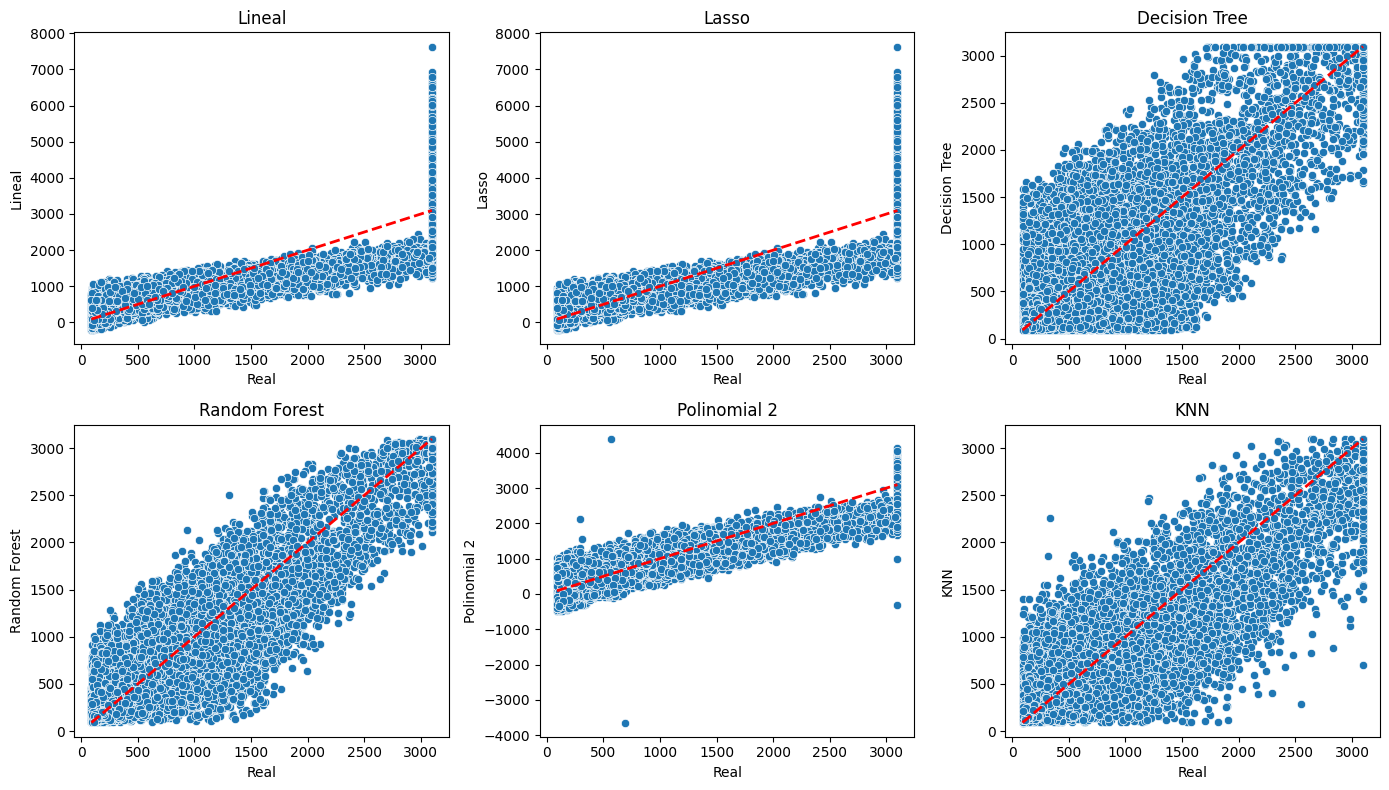

In [ ]:
# Dispersion de valores predecidos por cada modelo vs los reales
plt.figure(figsize=(14, 8))

for i, model in enumerate(df_predictions.columns[1:], 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x='Real', y=model, data=df_predictions)
    plt.plot([df_predictions['Real'].min(), df_predictions['Real'].max()],
             [df_predictions['Real'].min(), df_predictions['Real'].max()],
             '--r', linewidth=2)
    plt.title(model)

plt.tight_layout()
plt.show()

### Intervalos de confianza

In [ ]:
# Intervalos de confianza para modelos lineales y polinomiales

# Regresión Lineal
model_lin = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print('Intervalos de confianza para la Regresión Lineal:\n', model_lin.conf_int())

# Regresión Polinomial
model_poly = sm.OLS(y_train, sm.add_constant(X_train_poly)).fit()
print('\nIntervalos de confianza para la Regresión Polinomial:\n', model_poly.conf_int())

Intervalos de confianza para la Regresión Lineal:
                                  0              1
const                138821.001840  140819.864933
No Hijos                 21.019871      31.590015
Edad ingreso              0.883291       2.009740
Descubica                 0.129697       0.163223
Ultima Evaluación        74.520322      92.990319
Desc Fun                  0.177330       0.207499
Hombre                69392.896785   70392.343870
Mujer                 69428.066093   70427.560025
baja_liverpool        69432.907933   70498.495198
baja_suburbia         69303.481379   70405.982262
Eventual No Sind.     17264.798827   17607.580010
Eventual Sind.        16759.374977   17326.306696
Planta No Sind.       17494.245894   17835.314268
Planta Sind.          17532.889112   17888.110723
SBB Eventuales        17376.429380   18047.187822
SBB Planta            17392.577128   18062.937837
Vía Planta No Sind.   17184.979496   17529.198445
Vía Planta Sind.      16945.884102   17393.052055

### Comparar R2 y MSE

In [ ]:
model_performance = {
    'Model': ['Linear', 'Ridge', 'Lasso', 'Decision Tree', 'Random Forest', 'Polynomial', 'KNN'],
    'R2_Test': [r2_score(y_test, y_pred_lin), r2_score(y_test, y_pred_ridge), r2_score(y_test, y_pred_lasso), r2_score(y_test, y_pred_tree), r2_score(y_test, y_pred_forest), r2_score(y_test, y_pred_poly), r2_score(y_test, y_pred_knn)],
    'MSE_Test': [mean_squared_error(y_test, y_pred_lin), mean_squared_error(y_test, y_pred_ridge), mean_squared_error(y_test, y_pred_lasso), mean_squared_error(y_test, y_pred_tree), mean_squared_error(y_test, y_pred_forest), mean_squared_error(y_test, y_pred_poly), mean_squared_error(y_test, y_pred_knn)],
    'R2_Train': [r2_score(y_train, y_pred_lin_train), r2_score(y_train, y_pred_ridge_train), r2_score(y_train, y_pred_lasso_train), r2_score(y_train, y_pred_tree_train), r2_score(y_train, y_pred_forest_train), r2_score(y_train, y_pred_poly_train), r2_score(y_train, y_pred_knn_train)],
    'MSE_Train': [mean_squared_error(y_train, y_pred_lin_train), mean_squared_error(y_train, y_pred_ridge_train), mean_squared_error(y_train, y_pred_lasso_train), mean_squared_error(y_train, y_pred_tree_train), mean_squared_error(y_train, y_pred_forest_train), mean_squared_error(y_train, y_pred_poly_train), mean_squared_error(y_train, y_pred_knn_train)]
}

performance_df = pd.DataFrame(model_performance)

# Ordena los modelos por R2 y MSE en el conjunto de prueba para seleccionar los dos mejores
best_models_r2 = performance_df.sort_values(by='R2_Test', ascending=False).head(2)
best_models_mse = performance_df.sort_values(by='MSE_Test', ascending=True).head(2)

print("Mejores modelos basados en R2:")
print(best_models_r2)
print("\nMejores modelos basados en MSE:")
print(best_models_mse)

Mejores modelos basados en R2:
           Model   R2_Test       MSE_Test  R2_Train     MSE_Train
4  Random Forest  0.876930  106934.271766  0.980793  16676.061697
6            KNN  0.823798  153099.814831  0.889107  96281.667619

Mejores modelos basados en MSE:
           Model   R2_Test       MSE_Test  R2_Train     MSE_Train
4  Random Forest  0.876930  106934.271766  0.980793  16676.061697
6            KNN  0.823798  153099.814831  0.889107  96281.667619


# Evidencia 2

## Modelos No supervisados

### KMeans

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = data[['No Hijos', 'Edad ingreso', 'Descubica', 'Edad salida',
        'Ultima Evaluación', 'Desc Fun', 'duracion', 'Hombre', 'Mujer',
        'baja_liverpool', 'baja_suburbia', 'Eventual No Sind.',
        'Eventual Sind.', 'Planta No Sind.', 'Planta Sind.', 'SBB Eventuales',
        'SBB Planta', 'Vía Planta No Sind.', 'Vía Planta Sind.',
        'Year Ingreso']]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

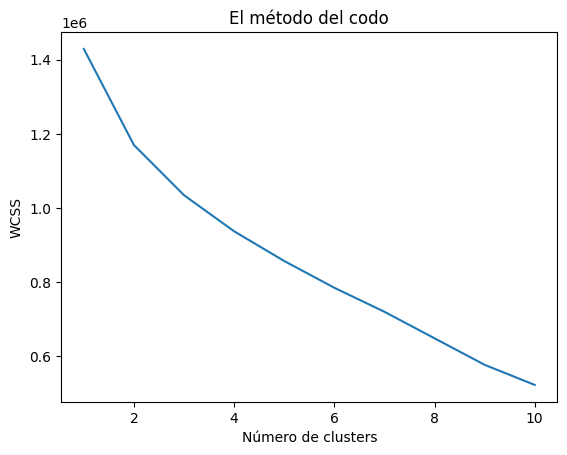

In [ ]:
import matplotlib.pyplot as plt

# Método del codo para encontrar el número óptimo de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Graficar los resultados del método del codo
plt.plot(range(1, 11), wcss)
plt.title('El método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS') # WCSS es la suma de cuadrados dentro del cluster
plt.show()

#### 4 Clusters

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [ ]:
# Añadir las etiquetas del cluster al DataFrame original
data['Cluster'] = kmeans.labels_

In [ ]:
display(data)

,No Hijos,Edad ingreso,Descubica,Edad salida,Ultima Evaluación,Desc Fun,duracion,Hombre,Mujer,baja_liverpool,...,Eventual No Sind.,Eventual Sind.,Planta No Sind.,Planta Sind.,SBB Eventuales,SBB Planta,Vía Planta No Sind.,Vía Planta Sind.,Year Ingreso,Cluster
0,0,21.0,982.036248,29.0,3.00,838.465089,2892,0,1,0,...,0,0,0,0,0,1,0,0,2014,1
1,0,41.0,982.036248,41.0,3.00,848.629416,99,1,0,0,...,0,0,0,0,0,1,0,0,2022,1
2,0,26.0,982.036248,26.0,3.00,534.210701,93,0,1,0,...,0,0,0,0,0,1,0,0,2022,1
3,0,24.0,982.036248,24.0,3.00,1053.153344,93,1,0,0,...,0,0,0,0,0,1,0,0,2022,1
4,0,18.0,982.036248,25.0,3.16,720.689704,2728,0,1,0,...,0,0,0,0,0,1,0,0,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71438,0,19.0,970.113922,19.0,3.00,805.793741,92,0,1,1,...,0,0,0,0,0,0,1,0,2018,0
71439,0,28.0,699.728499,29.0,3.00,805.793741,361,1,0,1,...,0,0,1,0,0,0,0,0,2019,2
71440,0,21.0,813.847524,21.0,3.00,805.793741,148,1,0,1,...,0,0,1,0,0,0,0,0,2019,2
71441,0,23.0,832.706359,24.0,3.00,805.793741,128,1,0,1,...,0,0,1,0,0,0,0,0,2019,2


In [ ]:
# Asumiendo que has añadido una columna 'Cluster' a tu DataFrame 'df'
cluster_sizes = data['Cluster'].value_counts()
print(cluster_sizes)


2    27822
0    15990
1    14564
3    13067
Name: Cluster, dtype: int64


In [ ]:
for k in range(kmeans.n_clusters):
    cluster = data[data['Cluster'] == k]
    profile = cluster.describe().transpose()
    print(f"Perfil para el cluster {k}:")
    print(profile)


Perfil para el cluster 0:
                       count         mean         std          min  \
No Hijos             15990.0     0.521138    0.922826     0.000000   
Edad ingreso         15990.0    26.719418    8.295936    17.000000   
Descubica            15990.0   831.312612  309.949050   242.865248   
Edad salida          15990.0    27.784522    8.529829    18.000000   
Ultima Evaluación    15990.0     2.999899    0.055686     1.000000   
Desc Fun             15990.0   729.401228  267.868090   346.634752   
duracion             15990.0   345.926517  527.778024    91.000000   
Hombre               15990.0     0.591119    0.491643     0.000000   
Mujer                15990.0     0.408881    0.491643     0.000000   
baja_liverpool       15990.0     0.999937    0.007908     0.000000   
baja_suburbia        15990.0     0.000063    0.007908     0.000000   
Eventual No Sind.    15990.0     0.633146    0.481961     0.000000   
Eventual Sind.       15990.0     0.000000    0.000000     0.0000

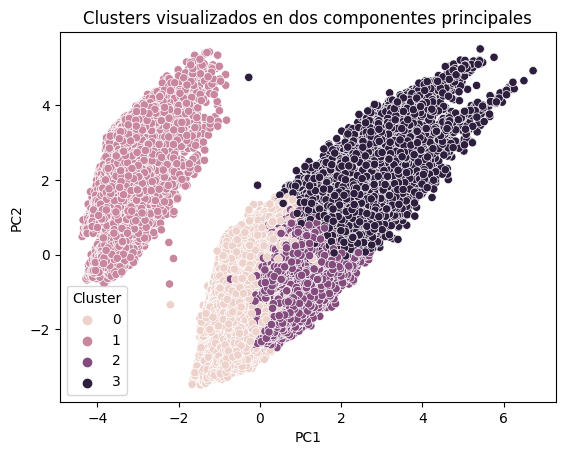

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Suponiendo que 'X_scaled' son tus datos escalados y 'kmeans' es tu modelo K-Means ya ajustado
# PCA para reducir la dimensionalidad
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convertir a DataFrame para visualización
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = kmeans.labels_

# Visualización de los clusters en las dos primeras componentes principales
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca)
plt.title('Clusters visualizados en dos componentes principales')
plt.legend(title='Cluster')
plt.show()


#### 2 Clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


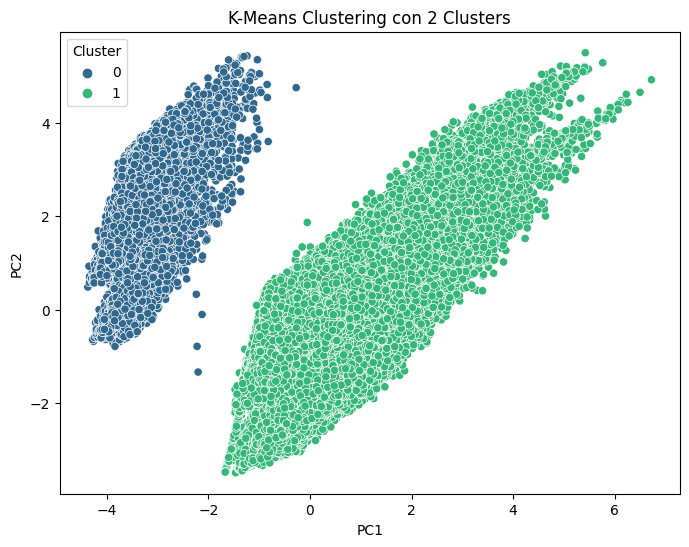

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asumiendo que 'X_scaled' es el DataFrame de tus datos ya escalados

# Aplicar K-Means con 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_2.fit(X_scaled)
labels_2 = kmeans_2.labels_

# Aplicar PCA para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear un DataFrame para la visualización de PCA
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels_2

# Visualizar los clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis')
plt.title('K-Means Clustering con 2 Clusters')
plt.legend(title='Cluster')
plt.show()


Perfiles de Cluster (Media de cada característica):
         No Hijos  Edad ingreso   Descubica  Edad salida  Ultima Evaluación  \
Cluster                                                                       
0        0.000137     28.795586  746.635912    31.226898           2.998825   
1        0.700529     27.048385  986.676120    30.426350           3.014099   

           Desc Fun    duracion    Hombre     Mujer  baja_liverpool  \
Cluster                                                               
0        776.253374  740.735549  0.372717  0.627283             0.0   
1        959.907199  988.068340  0.518013  0.481987             1.0   

         baja_suburbia  Eventual No Sind.  Eventual Sind.  Planta No Sind.  \
Cluster                                                                      
0                  1.0           0.000206        0.000000         0.000000   
1                  0.0           0.182024        0.000422         0.698437   

         Planta Sind.  SBB Eventu

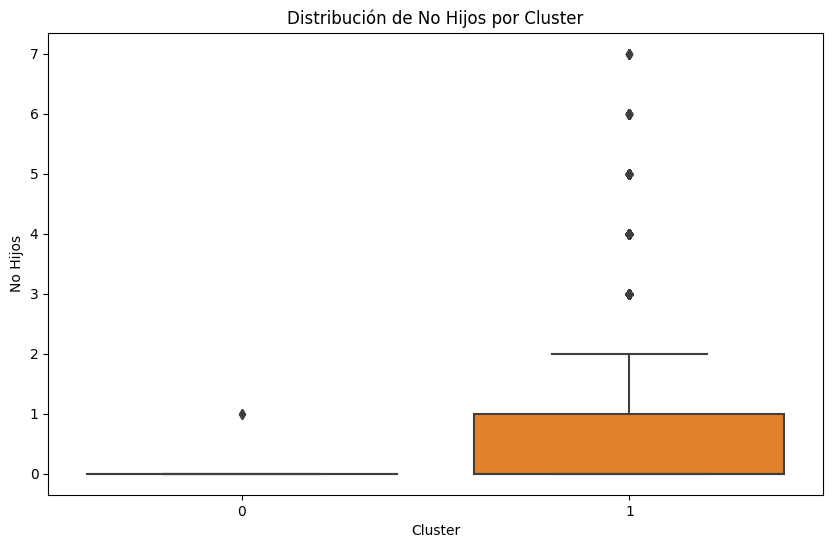

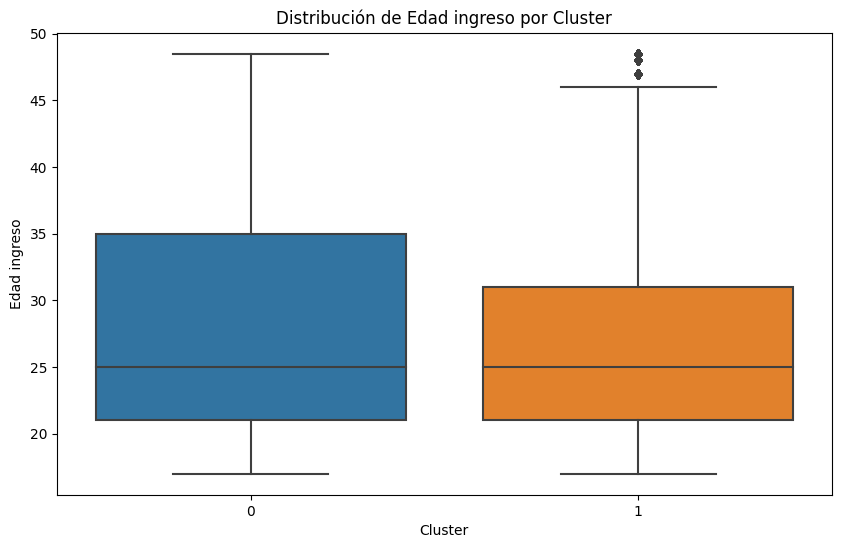

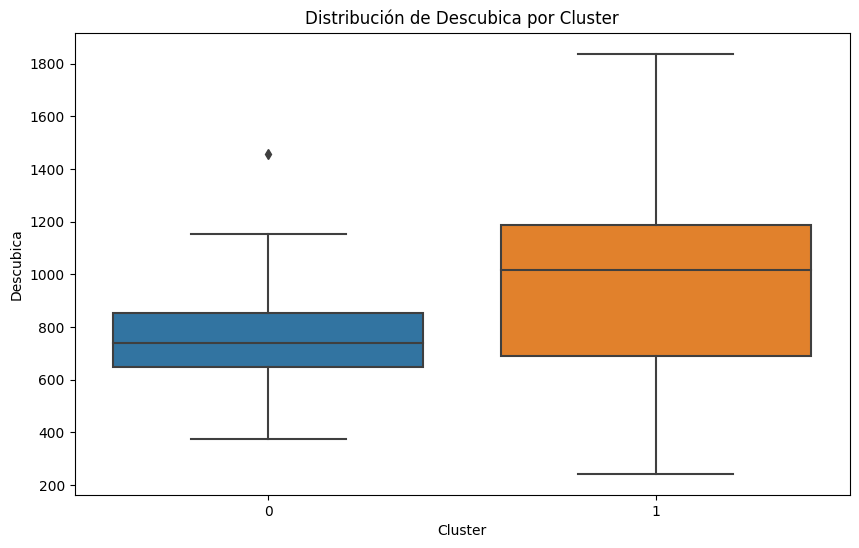

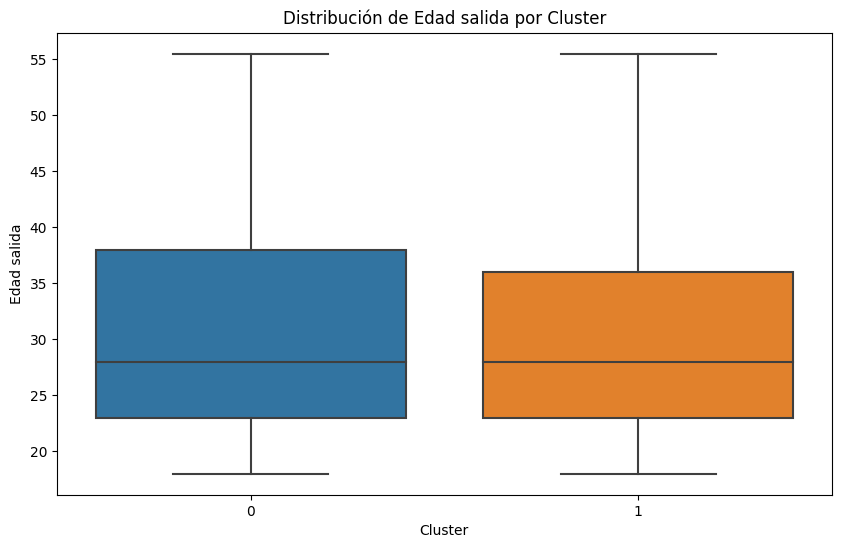

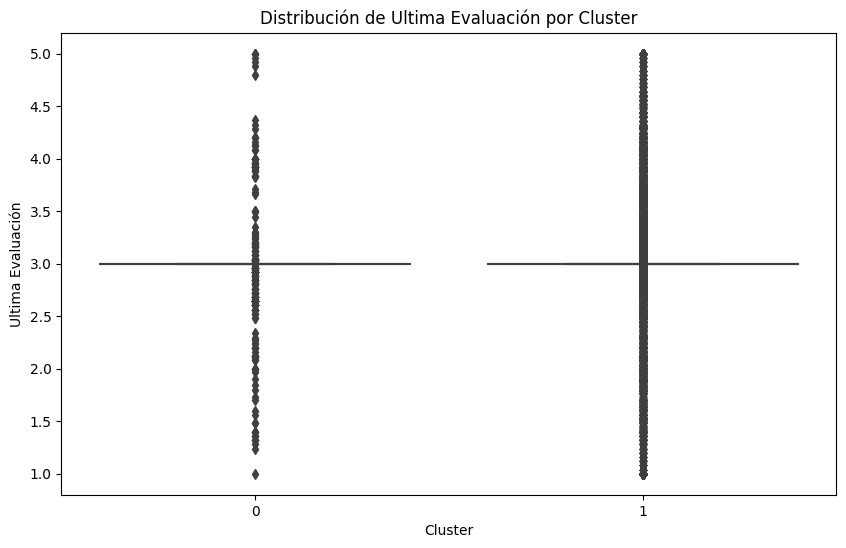

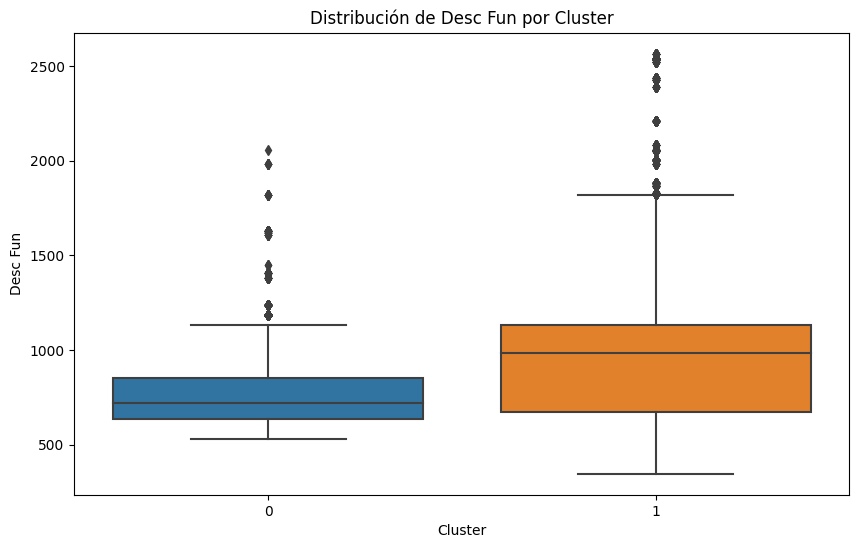

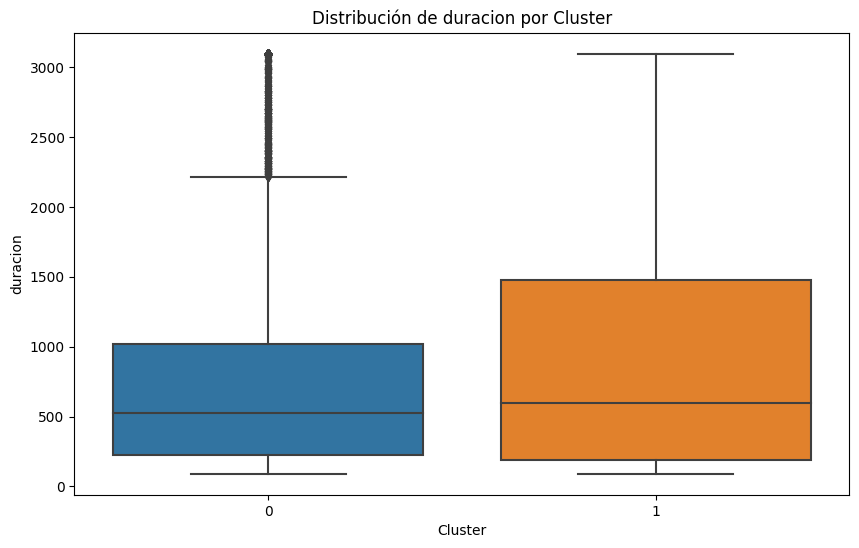

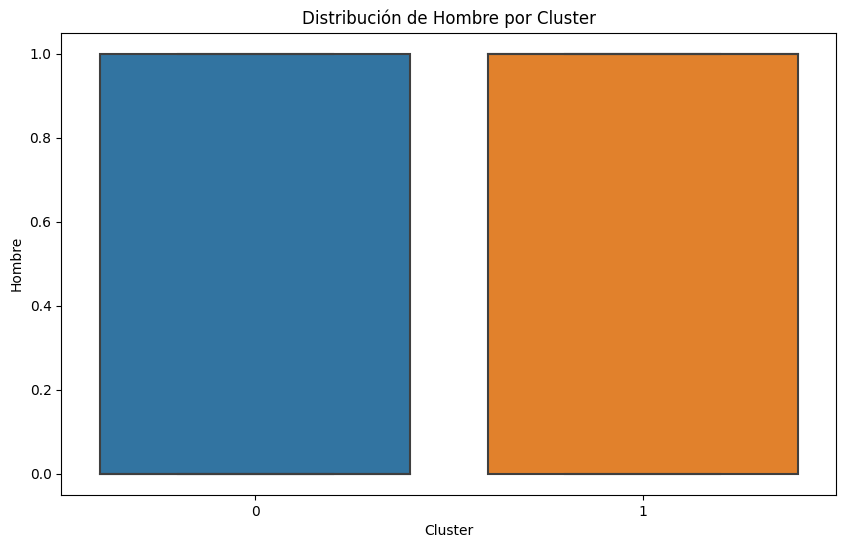

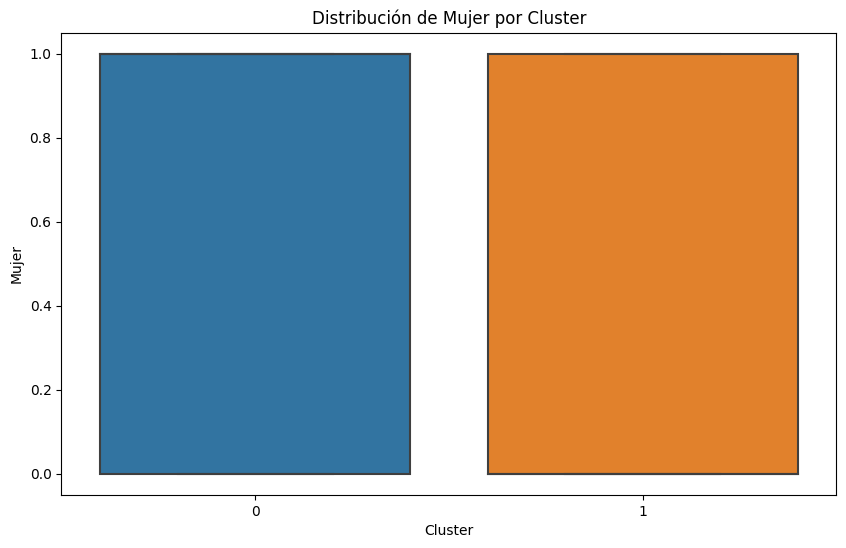

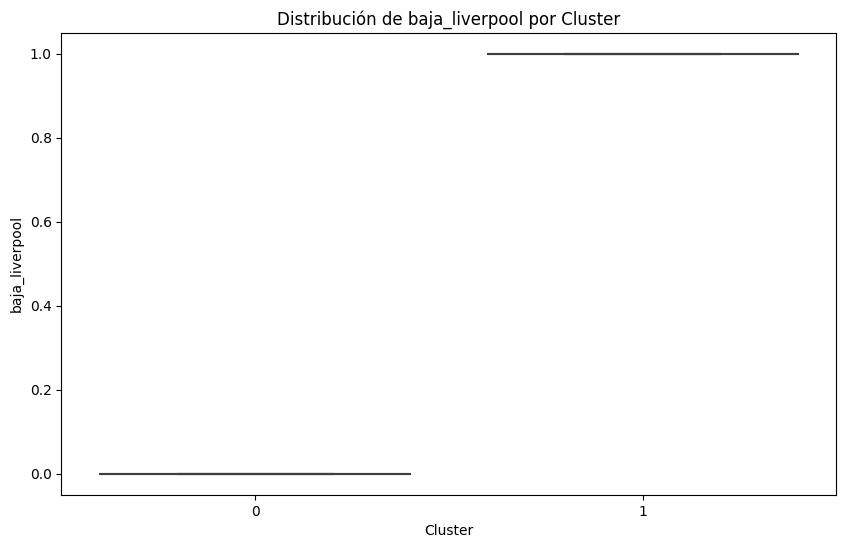

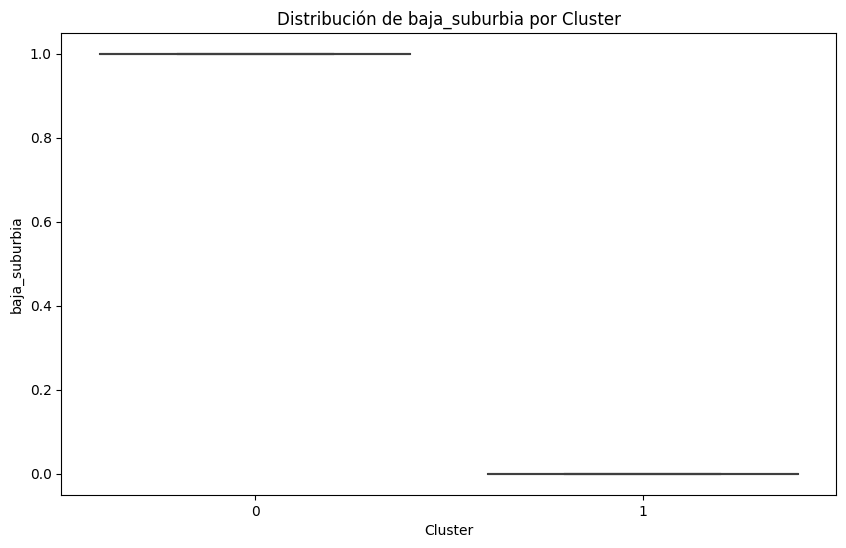

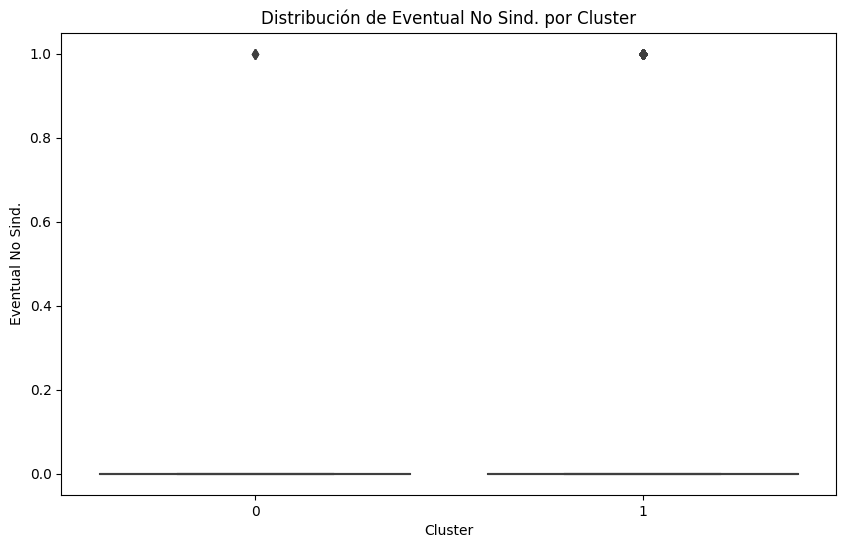

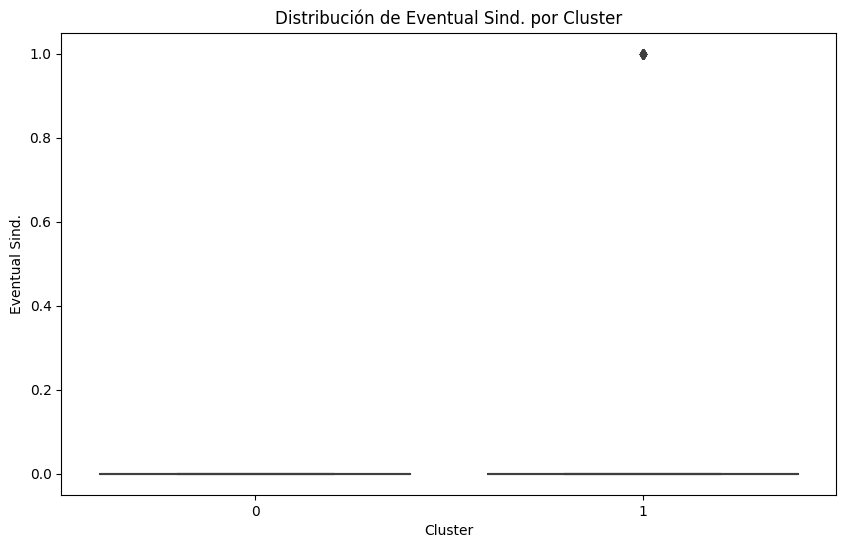

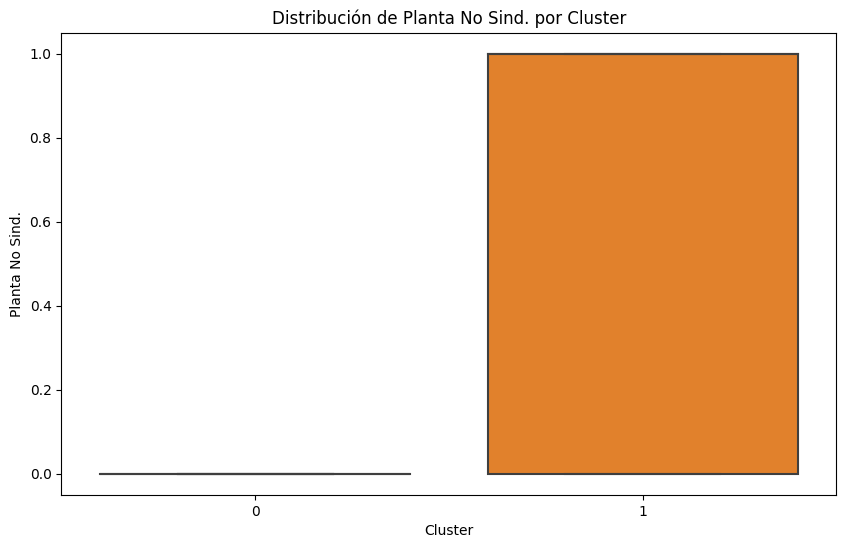

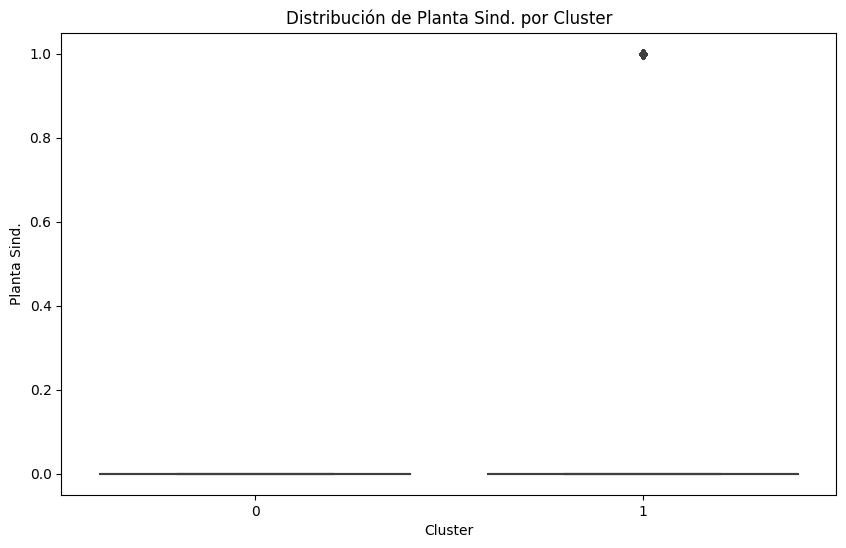

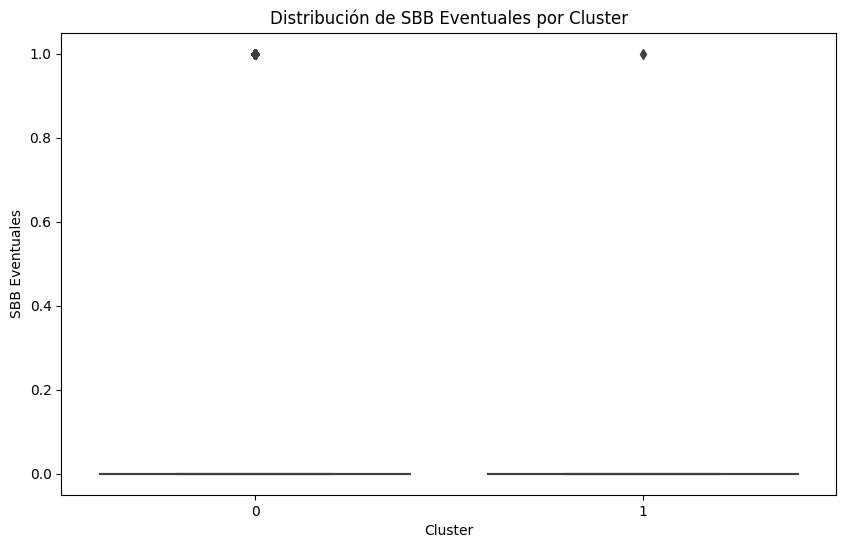

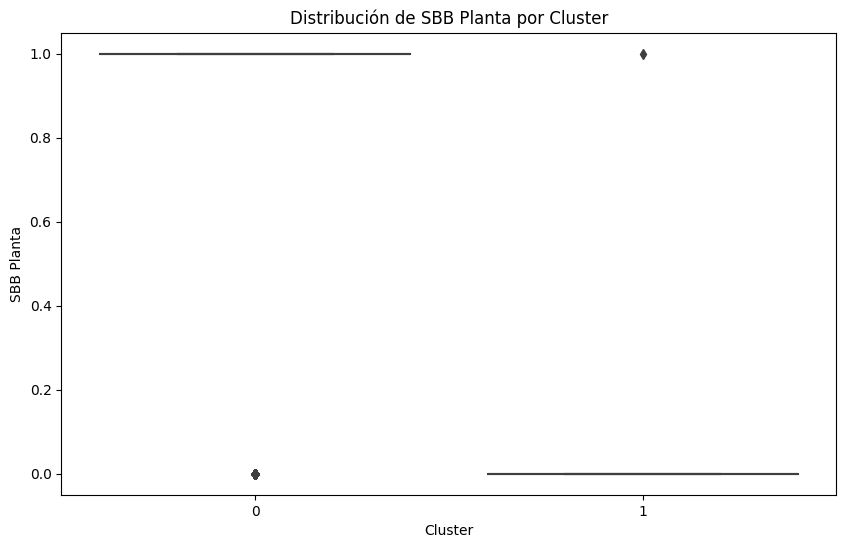

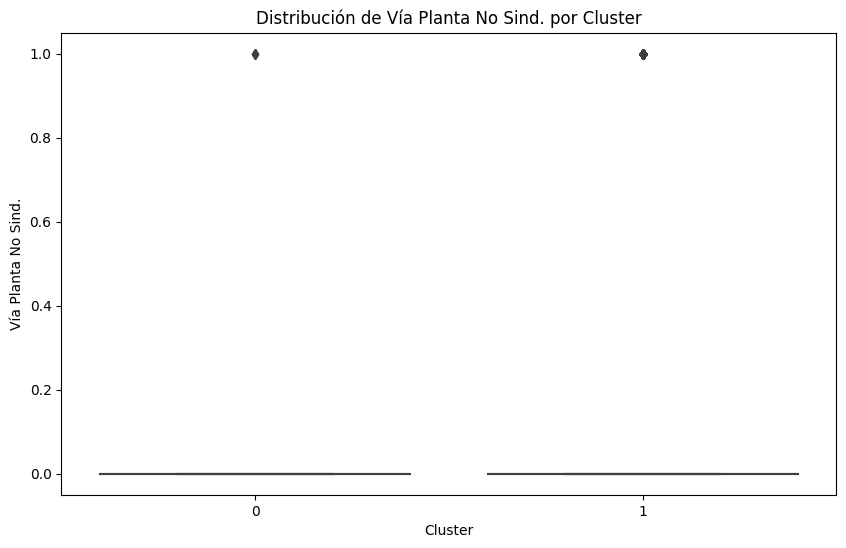

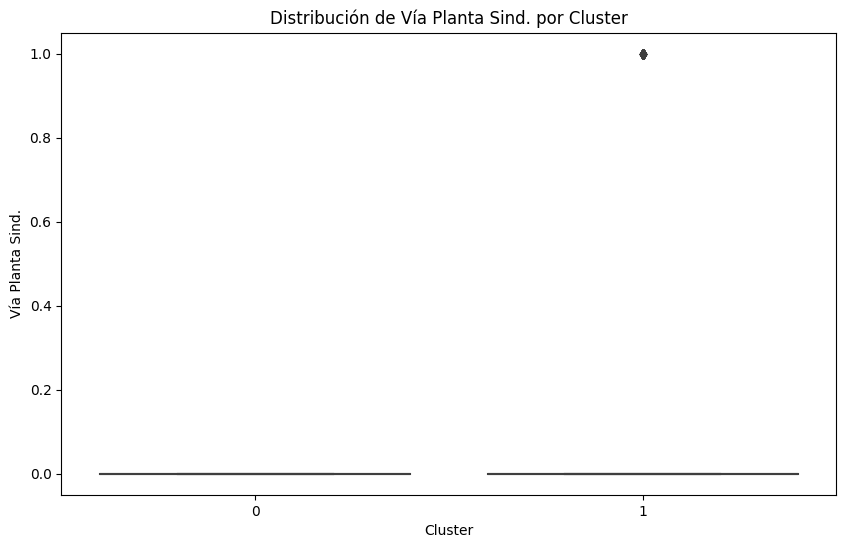

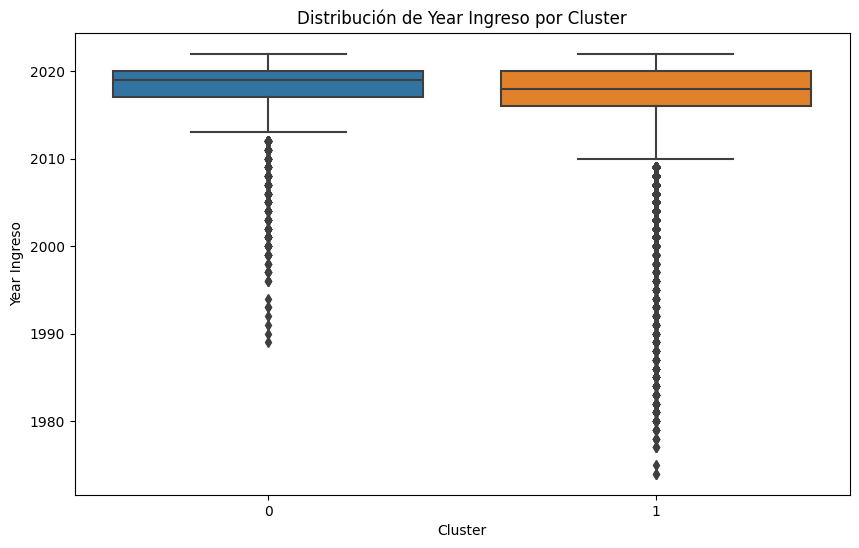

In [ ]:
# Asumiendo que 'df' es tu DataFrame original con las características antes de escalar
# y 'labels_2' son las etiquetas de los clusters obtenidas después de aplicar K-Means

# Añadir las etiquetas del cluster al DataFrame original
data['Cluster'] = labels_2

# Crear perfiles de cluster
cluster_profiles = data.groupby('Cluster').mean()

# Puedes también incluir otras estadísticas como la desviación estándar, mediana, etc.
# Por ejemplo, para la desviación estándar:
cluster_std_dev = data.groupby('Cluster').std()

# Visualización de las estadísticas descriptivas
print("Perfiles de Cluster (Media de cada característica):")
print(cluster_profiles)

print("\nDesviación Estándar de cada característica en los Clusters:")
print(cluster_std_dev)

# Si quieres visualizar también la mediana, podrías añadir:
# cluster_medians = df.groupby('Cluster').median()
# print(cluster_medians)

# Para una visualización más gráfica, puedes usar gráficos de barras o boxplots:
for col in data.columns[:-1]:  # Excluyendo la columna 'Cluster'
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=col, data=data)
    plt.title(f'Distribución de {col} por Cluster')
    plt.show()
